In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
LookupTable = pd.read_csv('Book1.csv')

LookupTable['Latin Label ']=LookupTable['Latin Label '].str.strip()
LookupTable['Arabic Label ']=LookupTable['Arabic Label '].str.strip()

In [37]:
look_dict = LookupTable.set_index('Latin Label ').T.to_dict('records')[0]

look_dict['sp'] = ' '

In [38]:
with open("Groundtruth-Latin-TrainingSet.txt") as f:
    lines = f.readlines()

In [39]:
Image = []
Text = []
for line in lines:
    Image.append(line.split()[0].replace('tif','png'))
    text = [look_dict[i] for i in line.split()[1:]]
    Text.append(''.join(text))

In [40]:
Train_Labels = pd.DataFrame(columns=['Image','Text'])
Train_Labels['Image'] = Image
Train_Labels['Text'] = Text

In [41]:
Train_Labels.to_csv('TrainLables.csv')

In [42]:
with open("Groundtruth-Latin-TestSet.txt") as f:
    lines = f.readlines()

In [43]:
Image = []
Text = []
for line in lines:
    Image.append(line.split()[0])
    text = [look_dict[i] for i in line.split()[1:]]
    Text.append(''.join(text))

In [44]:
Test_Labels = pd.DataFrame(columns=['Image','Text'])
Test_Labels['Image'] = Image
Test_Labels['Text'] = Text

In [45]:
Test_Labels.to_csv('TestLabels.csv')

In [46]:
pd.read_csv('TrainLables.csv')

,Unnamed: 0,Image,Text
0,0,AHTD3A0001_Para2_3.png,من العذاب في الآخرة وأفضل ما رزقهم الله تعالى ...
1,1,AHTD3A0001_Para2_4.png,لجميع الأشياء والذي لا يقدر أحد في الدنيا على ...
2,2,AHTD3A0001_Para3_1.png,فقال له إنك في منازل آبائك وأجدادك من الجبابر...
3,3,AHTD3A0001_Para3_2.png,قبلك وشيدوه دونك وبنوا القلاع والحصون ومهدوا ا...
4,4,AHTD3A0002_Para2_1.png,وكذلك طالب الآخرة مجتهد في العمل المنجي به روح...
...,...,...,...
1395,1395,AHTD3A0438_Para2_3.png,مثل حرة القوس التي قيل إنها كانت ترى كأنها حري...
1396,1396,AHTD3A0438_Para2_4.png,التي كان يخرج منها ما يشبه البرق ويسمع منها أص...
1397,1397,AHTD3A0438_Para3_1.png,ولعل قوة نيران حرة ضروان وشدة قذفها للحمم وارت...
1398,1398,AHTD3A0438_Para3_2.png,اليمن إلى التعبد لها والتحاكم إليها فقد كانوا ...


In [47]:
tr_len = [len(k) for k in Train_Labels['Text']]

Maximum label length in the training set 128


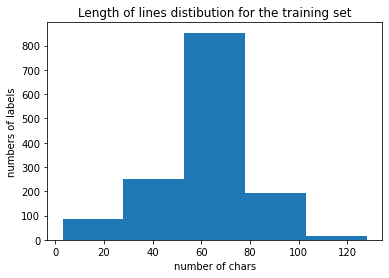

In [48]:
plt.figure()
plt.title('Length of lines distibution for the training set')
plt.xlabel('number of chars')
plt.ylabel('numbers of labels')
plt.hist(tr_len,bins=5)
# exploring the longest lines length
print('Maximum label length in the training set',str(max(tr_len)))

In [49]:
ts_len = [len(k) for k in Test_Labels['Text']]

Maximum label length in the test set 97


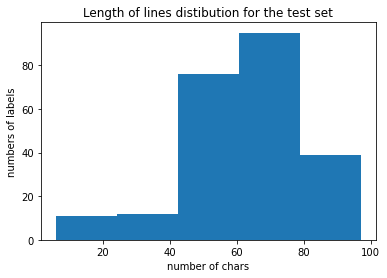

In [50]:
plt.figure()
plt.title('Length of lines distibution for the test set')
plt.xlabel('number of chars')
plt.ylabel('numbers of labels')
plt.hist(ts_len,bins=5)


print('Maximum label length in the test set',str(max(ts_len)))